In [1]:
## load useful libraries
suppressWarnings(suppressPackageStartupMessages(library(rhdf5)))
suppressWarnings(suppressPackageStartupMessages(library(qvalue)))
suppressWarnings(suppressPackageStartupMessages(library(dplyr)))
suppressWarnings(suppressPackageStartupMessages(library(cowplot)))
suppressWarnings(suppressPackageStartupMessages(library(tidyverse)))
suppressWarnings(suppressPackageStartupMessages(library(ggbeeswarm)))
suppressWarnings(suppressPackageStartupMessages(library(ggthemes)))
suppressWarnings(suppressPackageStartupMessages(library(scater)))
suppressWarnings(suppressPackageStartupMessages(library(SingleCellExperiment)))
suppressWarnings(suppressPackageStartupMessages(library(edgeR)))
suppressWarnings(suppressPackageStartupMessages(library(limma)))
suppressWarnings(suppressPackageStartupMessages(library(ggplot2)))
suppressWarnings(suppressPackageStartupMessages(library(ISLR)))
suppressWarnings(suppressPackageStartupMessages(library(GGally)))
suppressWarnings(suppressPackageStartupMessages(library(scran)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(circlize)))
suppressWarnings(suppressPackageStartupMessages(library(ComplexHeatmap)))
suppressWarnings(suppressPackageStartupMessages(library(Rtsne)))
# suppressWarnings(suppressPackageStartupMessages(library(Seurat)))

In [2]:
sce = readRDS("/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")

In [10]:
counts(sce)[1:5,1:5]

,21843_1#10,21843_1#100,21843_1#101,21843_1#102,21843_1#103
ENSG00000000003_TSPAN6,6.477660e+01,44.121248,74.62608,30.9973289,57.660477
ENSG00000000419_DPM1,5.914126e+01,33.543099,146.40061,107.1315402,88.443606
ENSG00000000457_SCYL3,1.741212e-04,0.140723,0.00000,0.8536811,3.526533
ENSG00000000460_C1orf112,2.558570e+00,11.291487,24.45429,44.6795240,23.378878
ENSG00000001036_FUCA2,9.389441e+00,6.909795,11.61077,13.6207492,28.625064


In [6]:
# Also read in a list of cell cycle markers, from Tirosh et al, 2015
cc.genes <- readLines(con = "/hps/nobackup/stegle/users/acuomo/regev_lab_cell_cycle_genes.txt")

In [7]:
cc.genes

[1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "MLF1IP"   "HELLS"    "RFC2"     "RPA2"    
[19] "NASP"     "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"   
[25] "UBR7"     "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"    
[31] "CDC45"    "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"     
[37] "CASP8AP2" "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"   
[43] "E2F8"     "HMGB2"    "CDK1"     "NUSAP1"   "UBE2C"    "BIRC5"   
[49] "TPX2"     "TOP2A"    "NDC80"    "CKS2"     "NUF2"     "CKS1B"   
[55] "MKI67"    "TMPO"     "CENPF"    "TACC3"    "FAM64A"   "SMC4"    
[61] "CCNB2"    "CKAP2L"   "CKAP2"    "AURKB"    "BUB1"     "KIF11"   
[67] "ANP32E"   "TUBB4B"   "GTSE1"    "KIF20B"   "HJURP"    "CDCA3"   
[73] "HN1"      "CDC20"    "TTK"      "CDC25C"   "KIF2C"    "RANGAP1" 
[79] "NCAPD2"   "DLGAP5"   "CDCA2"    "CDCA8"    "ECT2"     "KIF23"   
[85] "HMMR"     "AURKA"    "PSRC1"    "ANLN"     "LBR"      "CKAP5"   
[91] "CENPE"    "CTCF"     "NEK2"     "G2E3"     "GAS2L3"   "CBX5"    
[97] "CENPA"

In [5]:
# We can segregate this list into markers of G2/M phase and markers of S
# phase
s.genes <- cc.genes[1:43]
g2m.genes <- cc.genes[44:97]

In [6]:
s.genes
g2m.genes

[1] "MCM5"     "PCNA"     "TYMS"     "FEN1"     "MCM2"     "MCM4"    
 [7] "RRM1"     "UNG"      "GINS2"    "MCM6"     "CDCA7"    "DTL"     
[13] "PRIM1"    "UHRF1"    "MLF1IP"   "HELLS"    "RFC2"     "RPA2"    
[19] "NASP"     "RAD51AP1" "GMNN"     "WDR76"    "SLBP"     "CCNE2"   
[25] "UBR7"     "POLD3"    "MSH2"     "ATAD2"    "RAD51"    "RRM2"    
[31] "CDC45"    "CDC6"     "EXO1"     "TIPIN"    "DSCC1"    "BLM"     
[37] "CASP8AP2" "USP1"     "CLSPN"    "POLA1"    "CHAF1B"   "BRIP1"   
[43] "E2F8"

[1] "HMGB2"   "CDK1"    "NUSAP1"  "UBE2C"   "BIRC5"   "TPX2"    "TOP2A"  
 [8] "NDC80"   "CKS2"    "NUF2"    "CKS1B"   "MKI67"   "TMPO"    "CENPF"  
[15] "TACC3"   "FAM64A"  "SMC4"    "CCNB2"   "CKAP2L"  "CKAP2"   "AURKB"  
[22] "BUB1"    "KIF11"   "ANP32E"  "TUBB4B"  "GTSE1"   "KIF20B"  "HJURP"  
[29] "CDCA3"   "HN1"     "CDC20"   "TTK"     "CDC25C"  "KIF2C"   "RANGAP1"
[36] "NCAPD2"  "DLGAP5"  "CDCA2"   "CDCA8"   "ECT2"    "KIF23"   "HMMR"   
[43] "AURKA"   "PSRC1"   "ANLN"    "LBR"     "CKAP5"   "CENPE"   "CTCF"   
[50] "NEK2"    "G2E3"    "GAS2L3"  "CBX5"    "CENPA"

In [17]:
# Create our Seurat object and complete the initalization steps
obj <- CreateSeuratObject(raw.data = counts(sce))

In [18]:
obj

An object of class seurat in project SeuratProject 
 11231 genes across 36044 samples.

In [19]:
obj <- NormalizeData(object = obj)

In [20]:
obj <- FindVariableGenes(object = obj, do.plot = FALSE, display.progress = FALSE)

In [21]:
obj <- ScaleData(object = obj , display.progress = FALSE)

In [22]:
obj <- RunPCA(object = obj, pc.genes = obj@var.genes, pcs.print = 1:4, 
    genes.print = 10)

[1] "PC1"
 [1] "ENSG00000145423_SFRP2"   "ENSG00000166347_CYB5A"  
 [3] "ENSG00000113356_POLR3G"  "ENSG00000167600_CYP2S1" 
 [5] "ENSG00000154096_THY1"    "ENSG00000092068_SLC7A8" 
 [7] "ENSG00000121570_DPPA4"   "ENSG00000136110_LECT1"  
 [9] "ENSG00000119888_EPCAM"   "ENSG00000130182_ZSCAN10"
[1] ""
 [1] "ENSG00000147869_CER1"     "ENSG00000164292_RHOBTB3" 
 [3] "ENSG00000095596_CYP26A1"  "ENSG00000158815_FGF17"   
 [5] "ENSG00000100906_NFKBIA"   "ENSG00000090530_LEPREL1" 
 [7] "ENSG00000026025_VIM"      "ENSG00000121578_B4GALT4" 
 [9] "ENSG00000067225_PKM"      "ENSG00000239713_APOBEC3G"
[1] ""
[1] ""
[1] "PC2"
 [1] "ENSG00000167601_AXL"      "ENSG00000111057_KRT18"   
 [3] "ENSG00000140416_TPM1"     "ENSG00000170955_PRKCDBP" 
 [5] "ENSG00000107438_PDLIM1"   "ENSG00000162496_DHRS3"   
 [7] "ENSG00000188643_S100A16"  "ENSG00000156475_PPP2R2B" 
 [9] "ENSG00000152061_RABGAP1L" "ENSG00000008311_AASS"    
[1] ""
 [1] "ENSG00000185155_MIXL1" "ENSG00000148834_GSTO1" "ENSG00000164458_T"    


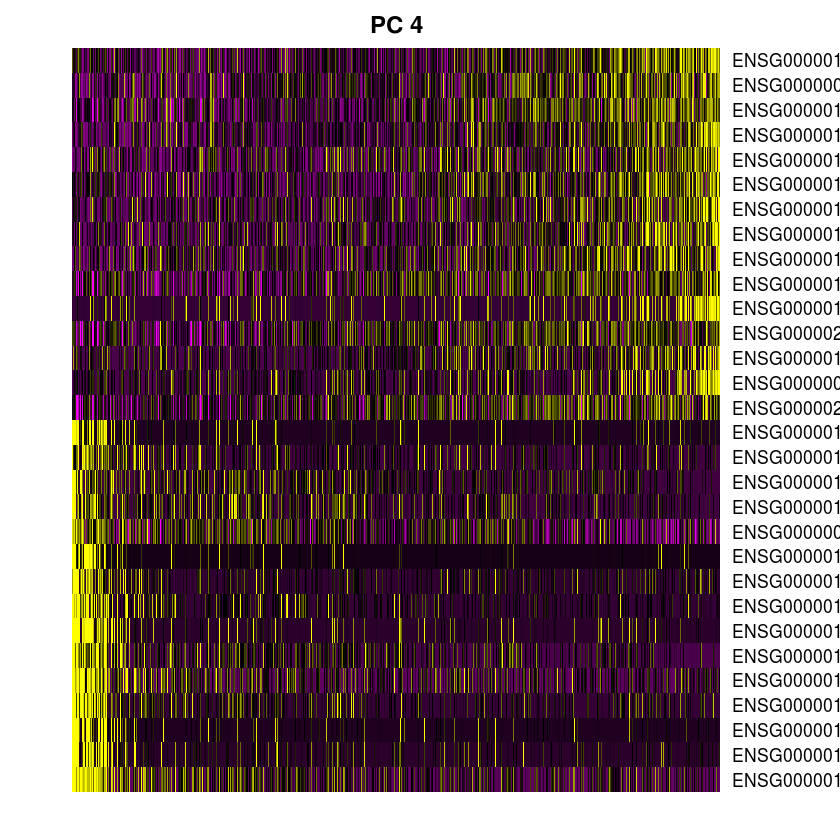

In [23]:
PCHeatmap(object = obj, pc.use = 4, do.balanced = TRUE, label.columns = FALSE, 
    remove.key = TRUE)

In [25]:
?CellCycleScoring

In [33]:
rownames(obj@data) <- gsub(".*_","",rownames(obj@data))
head(rownames(obj@data))

[1] "TSPAN6"   "DPM1"     "SCYL3"    "C1orf112" "FUCA2"    "GCLC"

In [35]:
obj <- CellCycleScoring(object = obj, s.genes = s.genes, g2m.genes = g2m.genes, 
    set.ident = TRUE)

In [36]:
# view cell cycle scores and phase assignments
head(x = obj@meta.data)

,nGene,nUMI,orig.ident,S.Score,G2M.Score,Phase,old.ident
21843_1#10,8924,594038.6,21843,0.211096707,-0.041512138,S,21843
21843_1#100,7841,220225.7,21843,0.057183167,-0.006917689,S,21843
21843_1#101,8743,578606.4,21843,0.012879229,0.032335921,G2M,21843
21843_1#102,8804,473281.6,21843,0.165563391,-0.132369652,S,21843
21843_1#103,8919,401529.3,21843,0.125968156,-0.103761495,S,21843
21843_1#105,9232,359095.5,21843,0.001511992,0.196756536,G2M,21843


In [57]:
cell_cycle = obj@meta.data

In [65]:
write.csv(cell_cycle,"/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/scQTLs/cell_cycle_annos_afterfilt.csv")

In [3]:
sce = normalize(sce)
design = model.matrix(~ experiment, data = colData(sce))
alt.fit = trendVar(sce, design = design, use.spikes = FALSE)
alt.decomp = decomposeVar(sce, alt.fit)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [59]:
sce_hvg <- sce[colData(sce)$is_intop500hvg,]

In [40]:
s.genes <- s.genes[s.genes %in% rownames(obj@data)]
g2m.genes <- g2m.genes[g2m.genes %in% rownames(obj@data)]

In [50]:
cc.genes <- cc.genes[cc.genes %in% rownames(obj@data)]

In [51]:
all(cc.genes %in% rownames(obj@data))

[1] TRUE

In [53]:
cc.genes %in% obj@var.genes

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [52]:
obj <- RunPCA(object = obj, pc.genes = cc.genes, do.print = FALSE)

ERROR: Error in irlba(A = t(x = data.use), nv = pcs.compute, ...): max(nu, nv) must be positive


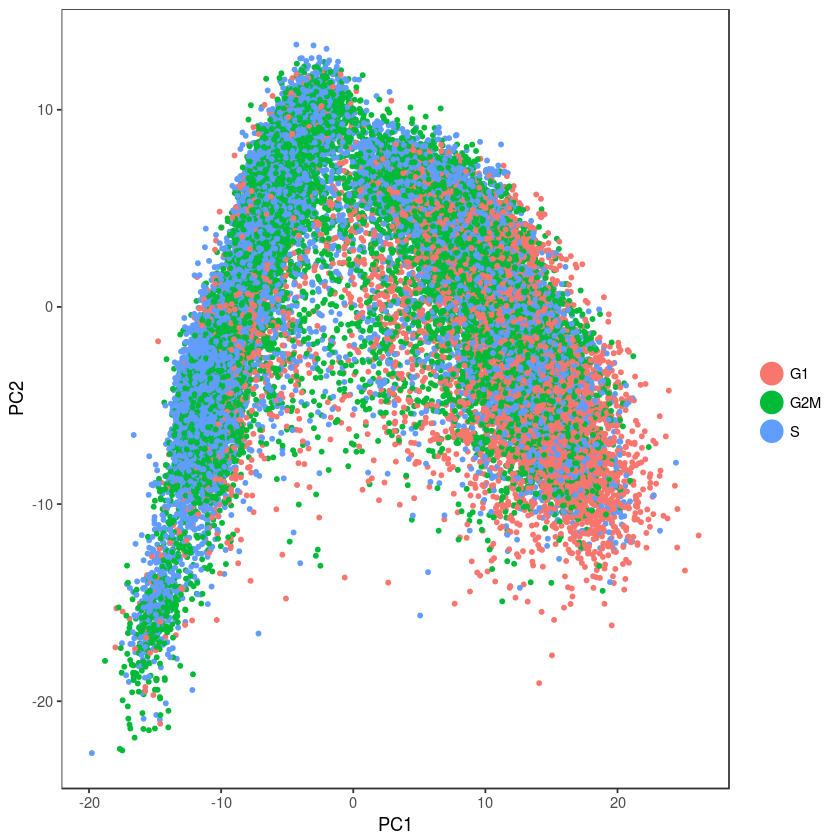

In [47]:
# Running a PCA on cell cycle genes reveals, unsurprisingly, that cells
# separate entirely by phase
obj <- RunPCA(object = obj, pc.genes = c(s.genes, g2m.genes), do.print = FALSE)
PCAPlot(object = obj)

In [4]:
mm.pairs <- readRDS(system.file("exdata", "human_cycle_markers.rds", package="scran"))
assignments <- cyclone(sce, mm.pairs, gene.names = rowData(sce)$ensembl_gene_id)

In [10]:
df = data.frame(cells = colnames(sce), phases = assignments$phases)
head(df)

cells,phases
21843_1#10,G1
21843_1#100,G1
21843_1#101,G1
21843_1#102,G1
21843_1#103,G1
21843_1#105,G1


In [11]:
sce$cyclone_phases <- df$phases

In [12]:
saveRDS(sce, "/hps/nobackup/hipsci/scratch/singlecell_endodiff/data_processed/merged/20180618/sce_merged_afterqc_filt_allexpts.rds")